In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
train_dir = '/content/drive/MyDrive/datasetimages/train'
test_dir = '/content/drive/MyDrive/datasetimages/test'


In [3]:
!ls /content/drive/MyDrive/datasetimages
!ls /content/drive/MyDrive/datasetimages/train


test  train
'Ajanta Caves'		'Fatehpur Sikri'      Khajuraho
 alai_darwaza		'Gateway of India'    lotus_temple
 alai_minar		'golden temple'       mysore_palace
 basilica_of_bom_jesus	'hawa mahal pics'     qutub_minar
'Charar-E- Sharif'	'Humayun_s Tomb'     'Sun Temple Konark'
 charminar		'India gate pics'     tajmahal
 Chhota_Imambara	 iron_pillar	     'tanjavur temple'
'Ellora Caves'		 jamali_kamali_tomb  'victoria memorial'


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [5]:
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32
EPOCHS = 10

train_dir = '/content/drive/MyDrive/datasetimages/train'
test_dir = '/content/drive/MyDrive/datasetimages/test'


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 3666 images belonging to 24 classes.
Found 1049 images belonging to 24 classes.


In [7]:
# Load MobileNetV2 base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model.trainable = False  # Freeze base layers

# Add custom classifier on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,425,048 (9.25 MB)

 Trainable params: 167,064 (652.59 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1077s 9s/step - accuracy: 0.1570 - loss: 3.0153 - val_accuracy: 0.2564 - val_loss: 2.8579
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 302s 3s/step - accuracy: 0.5829 - loss: 1.8672 - val_accuracy: 0.3489 - val_loss: 2.6436
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.7182 - loss: 1.2293 - val_accuracy: 0.3851 - val_loss: 2.6390
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 302s 3s/step - accuracy: 0.7705 - loss: 0.9640 - val_accuracy: 0.4328 - val_loss: 2.6578
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 332s 3s/step - accuracy: 0.8216 - loss: 0.7852 - val_accuracy: 0.4461 - val_loss: 2.7724
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.8523 - loss: 0.6367 - val_accuracy: 0.4633 - val_loss: 2.8299
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 312s 3s/step - accuracy: 0.8567 - loss: 0.5653 - val_accuracy: 0.4890 - val_loss: 2.9610
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 302s 3s/step - accuracy: 0.8747 - loss: 0.5055 - val_acc

In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.2,
                                 patience=3,
                                 verbose=1,
                                 min_lr=0.00001)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           verbose=1)

In [12]:
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
FINE_TUNE_EPOCHS = 10
history_fine = model.fit(
    train_generator,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=test_generator,
    callbacks=[lr_reduction, early_stop]
)


Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 416s 3s/step - accuracy: 0.7779 - loss: 0.8287 - val_accuracy: 0.4852 - val_loss: 3.3766 - learning_rate: 1.0000e-05
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 401s 3s/step - accuracy: 0.8663 - loss: 0.5619 - val_accuracy: 0.4929 - val_loss: 3.4735 - learning_rate: 1.0000e-05
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 405s 4s/step - accuracy: 0.8825 - loss: 0.4568 - val_accuracy: 0.4938 - val_loss: 3.5403 - learning_rate: 1.0000e-05
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 402s 3s/step - accuracy: 0.9050 - loss: 0.3771 - val_accuracy: 0.5014 - val_loss: 3.6154 - learning_rate: 1.0000e-05
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 399s 3s/step - accuracy: 0.9265 - loss: 0.3226 - val_accuracy: 0.5043 - val_loss: 3.6900 - learning_rate: 1.0000e-05
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 424s 4s/step - accuracy: 0.9344 - loss: 0.2789 - val_accuracy: 0.5071 - val_loss: 3.7473 - learning_rate: 1.0000e-05
Epoch 6: early stopping


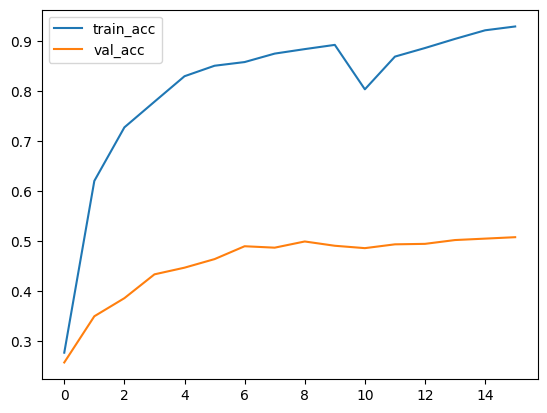

In [13]:
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


In [16]:
# After training your model
model.save('my_model.h5')  # Saves as HDF5 file


In [17]:
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')


In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '81.jpg'  # replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # same as model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
img_array /= 255.0  # normalize if you did during training


In [22]:
preds = model.predict(img_array)
predicted_class_index = np.argmax(preds, axis=1)[0]
print("Predicted class index:", predicted_class_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class index: 21


In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale images
datagen = ImageDataGenerator(rescale=1./255)

# Point to your training folder
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/datasetimages/test',  # replace with your actual path
    target_size=(224, 224),   # use your model's input size
    batch_size=32,
    class_mode='categorical'
)

# Extract class names
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)


Found 1049 images belonging to 24 classes.
Class names: ['Ajanta Caves', 'Charar-E- Sharif', 'Chhota_Imambara', 'Ellora Caves', 'Fatehpur Sikri', 'Gateway of India', 'Hawa mahal', 'Humayun_s Tomb', 'India_gate', 'Khajuraho', 'Sun Temple Konark', 'alai_darwaza', 'alai_minar', 'basilica_of_bom_jesus', 'charminar', 'golden temple', 'iron_pillar', 'jamali_kamali_tomb', 'lotus_temple', 'mysore_palace', 'qutub_minar', 'tajmahal', 'tanjavur temple', 'victoria memorial']


In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '81.jpg'  # your test image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = np.expand_dims(image.img_to_array(img)/255.0, axis=0)

# Make prediction
preds = model.predict(img_array)
predicted_class_index = np.argmax(preds, axis=1)[0]
predicted_label = class_names[predicted_class_index]

print("Predicted label:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Predicted label: tajmahal
